**PROJECT: STUDENT PERFORMANCE ANALYSIS**

**Objective:**

The objective of this project is to analyze the factors influencing student academic performance using the provided dataset containing demographic details and exam scores in math, reading, and writing. Through comprehensive **exploratory data analysis (EDA)** with Python (Pandas), we aim to uncover patterns and relationships between variables such as gender, race/ethnicity, parental education, lunch type, and test preparation courses, and their impact on student outcomes. Additionally, an interactive **Power BI dashboard** will be created to visually present insights, enabling clear interpretation and data-driven conclusions about the key factors affecting student performance.

**IMPORT LIBRARIES AND LOAD DATASET**

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

students_df = pd.read_csv('datasets/StudentsPerformance.csv')
students_df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**DATA OVERVIEW**

In [101]:
# Data Overview
print("Data Overview:")
print(students_df.info())

# Stats
print("\nStatistics:")
print(students_df.describe())

# shape
print("\nShape of the DataFrame:")
print(students_df.shape)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
2

In [102]:
# Check for missing values
print("\nMissing Values:")
print(students_df.isnull().sum())

# Check for duplicates
print("\nDuplicate Values:")
print(students_df.duplicated().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate Values:
0


**Initial Observations**

- The dataset is **complete** with no missing and duplicate values.
- Contains **1000 students** and **8 features**(5 categorical, 3 numerical).
- **Average Scores:** Reading **(69.2)** > Writing **(68.1)** > Math **(66.1)**.
- **Score Range** most students scored b/w **50-80**, but there are **ouliers** with very low scores(Math min=0).
- Several students achieved perfect scores **(100)** in all subjects.
- Variability in scores is moderate **(std ≈ 15)**, indicating mixed performance levels.

In [103]:
# Rename columns for easier access
students_df.columns = students_df.columns.str.replace(' ', '_').str.lower()
students_df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS - EDA QUESTIONS**

**Q1. Which parental education level is linked with the highest average math score?**


Average Math Score by Parental Level of Education:
parental_level_of_education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math_score, dtype: float64


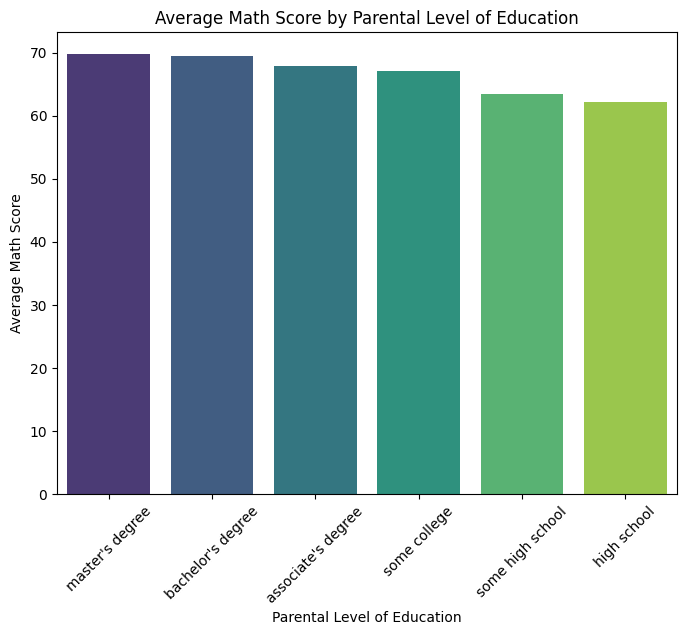

In [104]:
avg_math_score_by_parental_edu = students_df.groupby('parental_level_of_education')['math_score'].mean().sort_values(ascending=False)
print(f"\nAverage Math Score by Parental Level of Education:\n{avg_math_score_by_parental_edu}")
plt.figure(figsize=(8,6))
sns.barplot(x=avg_math_score_by_parental_edu.index,
            y=avg_math_score_by_parental_edu.values,
            hue=avg_math_score_by_parental_edu.index,
            palette='viridis', 
            legend=False)
plt.title('Average Math Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Math Score')
plt.xticks(rotation=45)
plt.show()

- **Master's Degree** parental education level is linked with highest avg math score **(69.7)**.

**Q2. Is there a significant score difference between males and females across all subjects?**

In [105]:
scores_by_gender = students_df.groupby('gender')[['math_score','reading_score','writing_score']].mean()
scores_by_gender

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Figure size 1000x600 with 0 Axes>

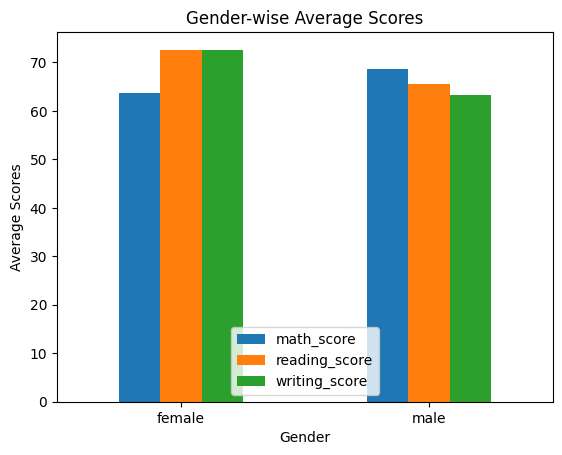

In [106]:
plt.figure(figsize=(10,6))
scores_by_gender.plot(kind='bar', title="Gender-wise Average Scores")
plt.xlabel("Gender")
plt.ylabel("Average Scores")
plt.xticks(rotation=0)
plt.show()

- Yes, there is a significant difference between male and female scores across subjects:
    - **Math Score:** Males **(68.7)** outperform Females **(63.6)** by about **5** points.
    - **Reading Score:** Females **(72.6)** outperform Males **(65.5)** by about **7** points.
    - **Writing Score:** Females **(72.5)** outperform Males **(63.3)** by about **9** points.
- Males perform better in Math, while Females significantly outperform in Reading and Writing.

**Q3. How much does completing the test preparation course improve performance in each subject?**

In [107]:
test_prep_affect_on_scores = students_df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].mean()
test_prep_affect_on_scores

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


- Completing the test preparation course improves scores by about **+5.6 in Math**, **+7.4 in Reading**, and **+9.9 in Writing**, showing the biggest impact on Writing.

**Q4. Which combination of gender, lunch type, and test preparation status produces the top 10% of scores?**

In [108]:
students_df['total_score'] = students_df['math_score'] + students_df['reading_score'] + students_df['writing_score']
top_10_percent_scores = students_df[students_df['total_score'] >= students_df['total_score'].quantile(0.90)]

top_10_combo = top_10_percent_scores.groupby(['gender', 'lunch', 'test_preparation_course']).size().sort_values(ascending=False)
top_10_combo

gender  lunch         test_preparation_course
female  standard      none                       31
                      completed                  29
male    standard      completed                  20
                      none                        9
female  free/reduced  completed                   6
male    free/reduced  completed                   3
female  free/reduced  none                        2
male    free/reduced  none                        2
dtype: int64

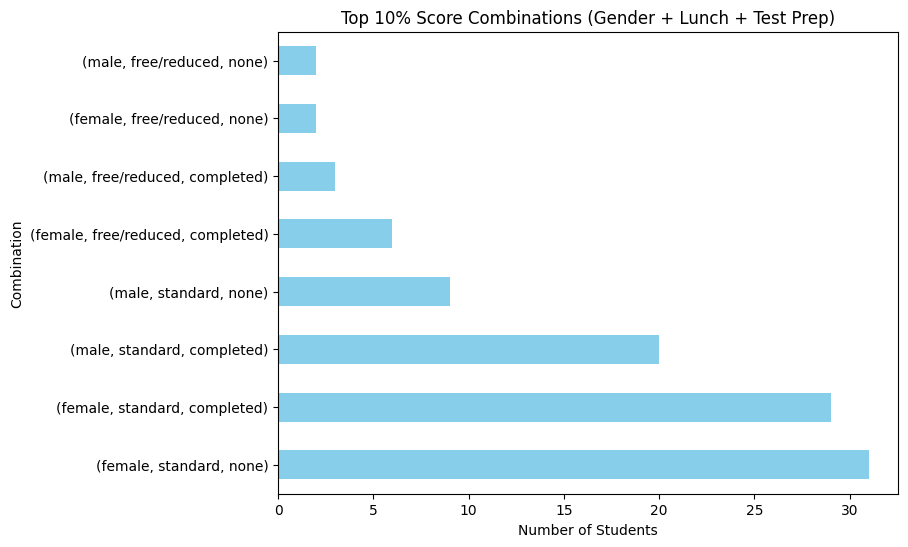

In [109]:

plt.figure(figsize=(8,6))
top_10_combo.plot(kind='barh', color='skyblue')
plt.title('Top 10% Score Combinations (Gender + Lunch + Test Prep)')
plt.xlabel('Number of Students')
plt.ylabel('Combination')
plt.show()

- Top scorers mostly have **standard lunch** → Good nutrition correlates with better performance.
- **Females** dominate top 10% (especially with standard lunch, both with and without test prep).
- Test preparation course helps both genders, but:
    - For males, completing test prep has a big impact **(20 vs 9)**.
    - For females, even without test prep, they appear in top scorers.
- **Free/reduced** lunch students are rare in top 10%.
- **Best-performing combination:**
    - **Female + Standard Lunch + None/Completed test prep**.

**Q5. Does lunch type have a uniform impact across all race/ethnicity groups, or does its effect vary?**

In [110]:
lunch_race_mean = students_df.groupby(['race/ethnicity','lunch'])['total_score'].mean().unstack()
print(lunch_race_mean)

lunch           free/reduced    standard
race/ethnicity                          
group A           172.972222  199.849057
group B           182.927536  204.090909
group C           181.236842  212.604878
group D           194.000000  215.239521
group E           202.487805  224.787879


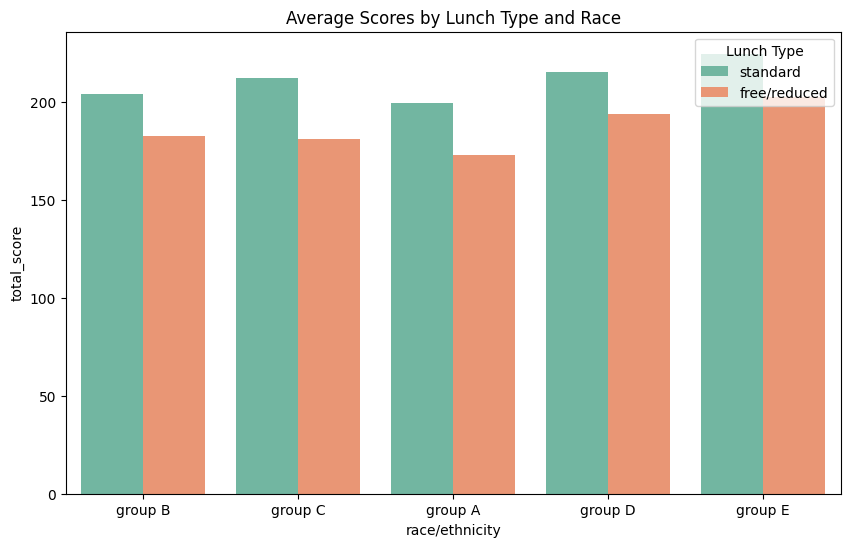

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(data=students_df, 
            x='race/ethnicity', 
            y='total_score', 
            hue='lunch', 
            palette="Set2", 
            errorbar=None)
plt.title("Average Scores by Lunch Type and Race")
plt.legend(title="Lunch Type", loc='upper right')
plt.show()


- **Standard lunch** is associated with higher total scores across all race/ethnicity groups.
- **Impact of lunch type is not uniform** — it varies: the gap is **largest** in **Group C (~31 points)** and **smallest** in **Groups B, D, and E (~21–22 points)**, showing that lunch type’s effect varies by group.

**Q6. What is the correlation between reading and writing scores? Is it stronger than math and writing?**

<Axes: >

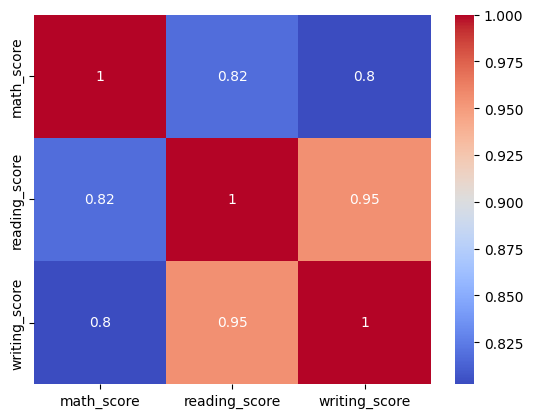

In [112]:
correlation_matrix = students_df[['math_score', 'reading_score', 'writing_score']].corr()
# print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

- The correlation between **reading and writing scores (0.95)** is very strong, indicating students who excel in reading almost always perform well in writing. This relationship is stronger than the correlation between **math and writing (0.80)**, showing math is less closely linked to writing skills.

**Q7. Identify the top 5% performing students and analyze their demographic profiles. What patterns emerge?**

In [113]:
# identify top 5% students using quantile(0.95)
top_5_percent = students_df[students_df['total_score'] >= students_df['total_score'].quantile(0.95)]

# Group the top 5% students by gender, race, and parental education to see which demographics dominate among high performers
top_5_percent.groupby(['gender', 'race/ethnicity', 'parental_level_of_education']).size() 

gender  race/ethnicity  parental_level_of_education
female  group A         some high school               1
        group B         associate's degree             2
                        bachelor's degree              1
                        master's degree                1
                        some college                   1
        group C         associate's degree             2
                        bachelor's degree              3
                        some college                   2
        group D         associate's degree             1
                        bachelor's degree              2
                        high school                    1
                        master's degree                3
                        some college                   2
                        some high school               2
        group E         associate's degree             5
                        bachelor's degree              3
                        high school 

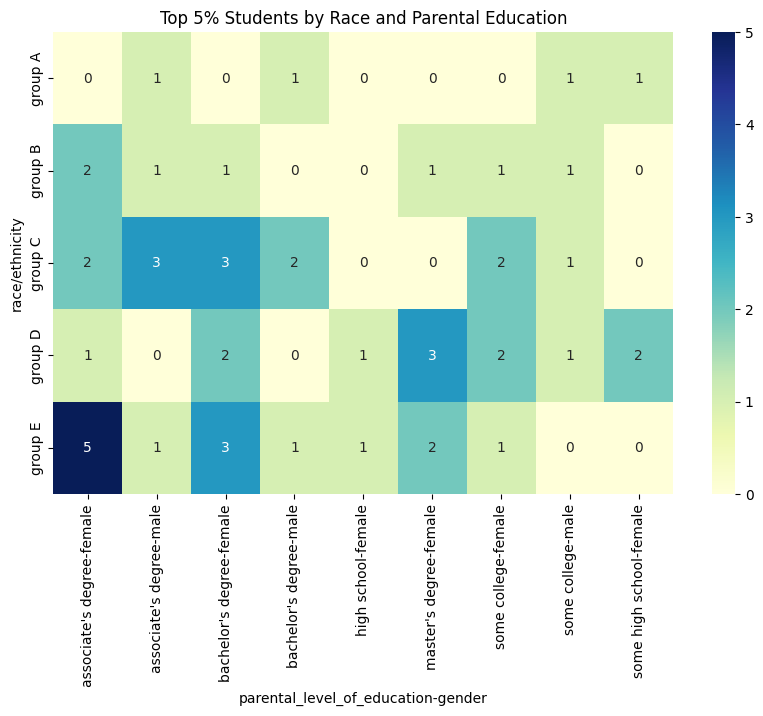

In [114]:
pivot = top_5_percent.pivot_table(
    index='race/ethnicity',
    columns=['parental_level_of_education','gender'],
    values='total_score',
    aggfunc='count',
    fill_value=0
)
# print(pivot)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Top 5% Students by Race and Parental Education")
plt.show()

- **Females dominate** the top 5% across most race and parental education groups.
- **Group E** has the highest concentration of top performers, followed by **Group C**.
- **Group A** has the least representation among top scorers.
- **Higher parental education** (associate’s, bachelor’s, master’s) is strongly linked to top student performance.
- Few top performers come from families with **only high school or some high school** education, though exceptions exist.

**Q8. Can we cluster students into performance categories (e.g., low, medium, high performers) using just Pandas logic? If yes, how?**

In [115]:
def categorize_performance(score):
    if score >= students_df['total_score'].quantile(0.75): # top 25% 
        return 'High'
    elif score >= students_df['total_score'].quantile(0.25): # between 25% and 75% = 50%
        return 'Medium'
    else: # bottom 25%
        return 'Low'

students_df['performance_category'] = students_df['total_score'].apply(categorize_performance)

students_df['performance_category'].value_counts()


performance_category
Medium    499
High      254
Low       247
Name: count, dtype: int64

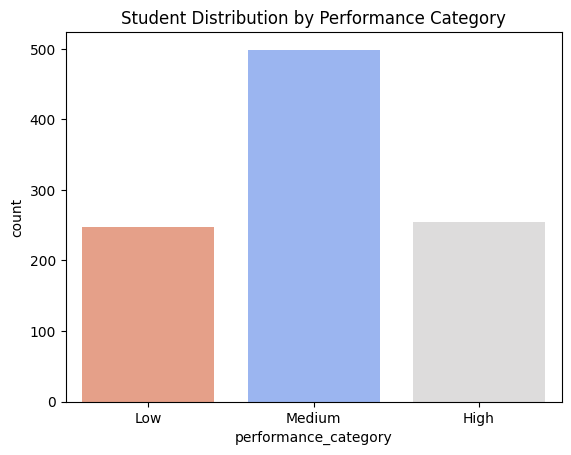

In [116]:
sns.countplot(data=students_df,
              x='performance_category',
              hue='performance_category',
              order=['Low','Medium','High'],
              palette='coolwarm',
              legend=False)
plt.title("Student Distribution by Performance Category")
plt.show()

- Students were clustered into **Low (bottom 25%)**, **Medium (middle 50%)**, and **High (top 25%)** performers using total score quartiles.
- Most students **(499)** fall in the **Medium** category, while **High (254)** and **Low (247)** performers are nearly equal, showing a balanced distribution apart from the central majority.

**EXPORTING DATASET**

In [117]:
students_df.to_csv('datasets/processed_students_performance.csv', index=False)